# CSL701: MACHINE Learning Lab 2025 D.B.I.T
## Student name: Sarvesh Vikas Tikekar (2022120037)



#### Experiment No: 1: Implementation of Linear Regression

In [21]:
#importing all the necessary libraries like LinearRegressModel, Metrics for errors, visualisation and math manipulation 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Dataset taken from https://www.kaggle.com/datasets/huyngohoang/housingcsv (Dataset 1)

data = pd.read_csv('housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
#Getting info about the dataset wuith info and columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


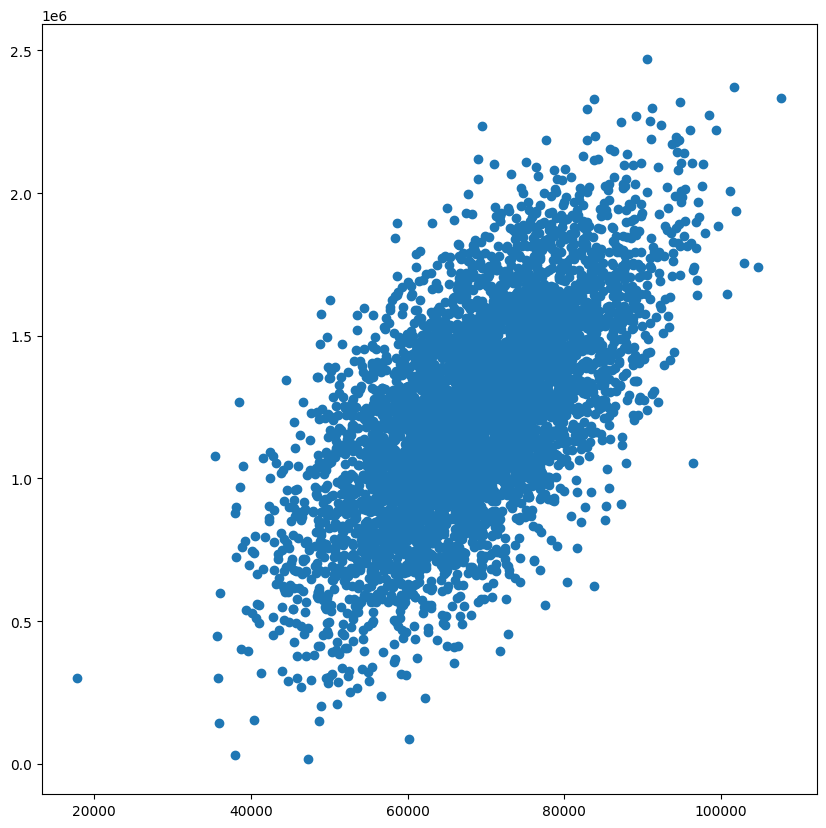

In [4]:
#Relationship between avg area income and price of house (All samples)
X = data['Avg. Area Income']
y = data['Price']

plt.figure(figsize=(10, 10))
plt.scatter(X, y)

In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
#Finding correlations between features and class (For multiple linear Regression)

corrData = data.drop(columns=['Address'])
correlations = corrData.corr()

correlations

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


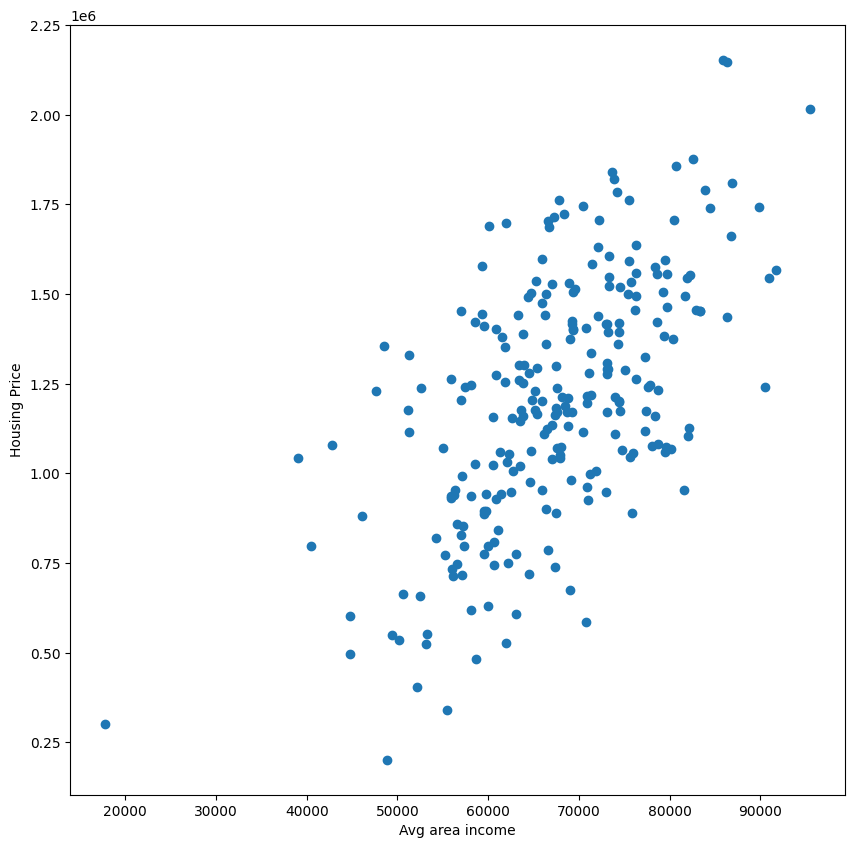

In [7]:
#Relationship between avg area income and price of house (250 samples)

refined_data = data[data.index < 250]

X = refined_data['Avg. Area Income']
y = refined_data['Price']

plt.figure(figsize=(10, 10))
plt.xlabel("Avg area income")
plt.ylabel("Housing Price")
plt.scatter(X, y)

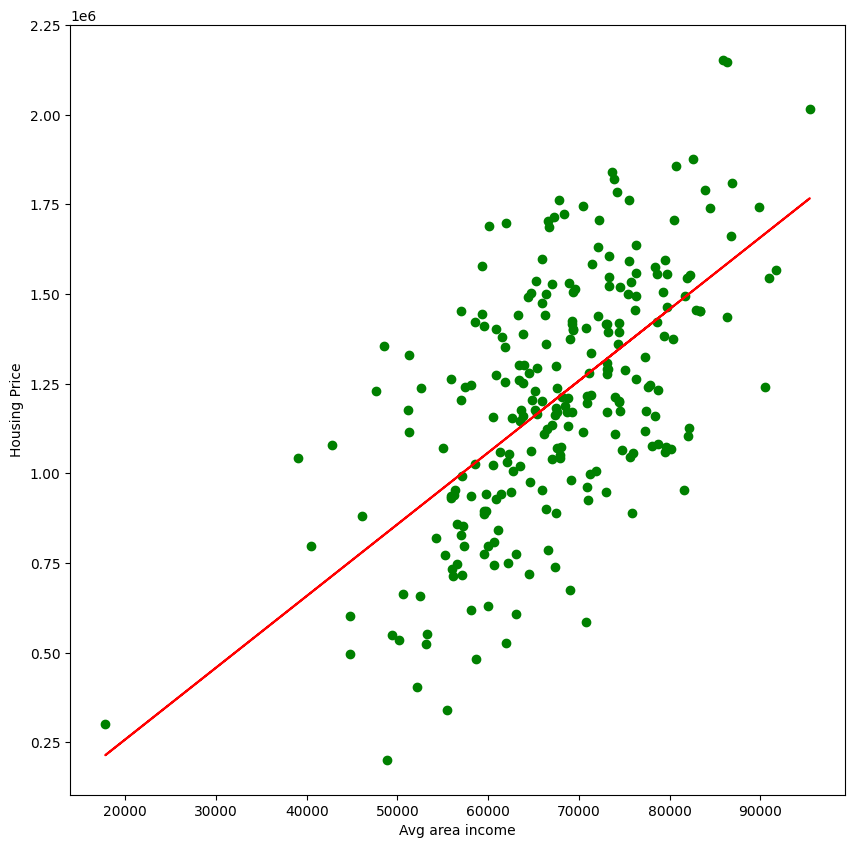

In [8]:
#Now we compute Linear regression and plot it for the 250 samples
def linearRegression(X, y):

    slope, intercept, p, r, stderr = stats.linregress(X, y)
    predictedPoints = [slope * x + intercept for x in X]

    plt.figure(figsize=(10,10))
    plt.scatter(X, y, label="Data Points", color='green')
    plt.plot(X, predictedPoints, color='red')
    plt.xlabel("Avg area income")
    plt.ylabel("Housing Price")
    plt.show()
    
linearRegression(X, y)

### For new dataset we would be using the train test split (Dataset Link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)
### Part done on 22nd July 2025

In [31]:
#For a new housing dataset

data2 = pd.read_csv('Housing.csv')

In [32]:
data2.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [33]:
X = data2[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data2['price']

# We split our dataset into train and test states, for a random state of 42 and having shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [34]:
# Linear Regress model object and fitting our features and classes

lr_model = LinearRegression()
lr_model.fit(X, y)

# Predicting value based on X_test

y_pred = lr_model.predict(X_test)

#Metric calculation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE --> {mse}")
print(f"R squared error --> {r2}")

MSE --> 2225221777584.0405
R squared error --> 0.5597604407245839


/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


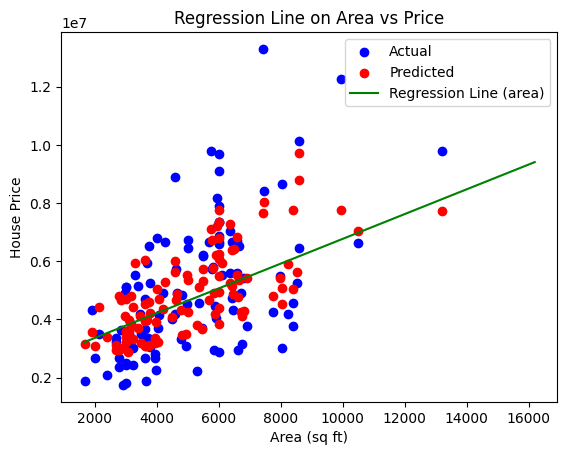

     Feature   Coefficient
0       area  3.311155e+02
1   bedrooms  1.678098e+05
2  bathrooms  1.133740e+06
3    stories  5.479398e+05
4    parking  3.775963e+05
Intercept: -145734.4894558806


In [36]:
#We plot a scatter plot 

plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['area'].min(), X['area'].max(), 100).reshape(-1, 1)

area_model = LinearRegression()
area_model.fit(X_train[['area']], y_train)
# two square brackets convert input to 2d column
area_pred_line = area_model.predict(area_values)
plt.plot(area_values, area_pred_line, color='green', label='Regression Line (area)')

plt.xlabel('Area (sq ft)')
plt.ylabel('House Price')
plt.title('Regression Line on Area vs Price')
plt.legend()
plt.show()

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coefficients)
print("Intercept:", lr_model.intercept_)

In [40]:
#Max and min value of price

print(data2['price'].min())
print(data2['price'].max())

1750000
13300000


### Dataset 3 (For advanced Practice)
#### Dataset Link: https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression

In [47]:
data3 = pd.read_csv('Datasets/ElectricityConsumption.csv')

In [48]:
data3

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
1095,Commercial,1161,81,11,15.45,Weekend,3010.81
1096,Residential,37943,50,23,21.73,Weekend,4248.49
1097,Commercial,1558,27,29,16.86,Weekend,2843.60
1098,Industrial,2145,56,12,11.77,Weekend,3348.39


In [49]:
#Printing only the first 10 rows

data3.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
5,Commercial,37377,26,32,16.24,Weekend,4687.67
6,Industrial,38638,92,14,21.01,Weekend,5526.83
7,Residential,34950,60,18,28.24,Weekday,4116.32
8,Industrial,29741,99,44,13.08,Weekday,5841.65
9,Residential,17467,42,36,28.84,Weekday,3419.13


In [51]:
data3.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [52]:
#We now split the dataset

X = data3[['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']]
y = data3['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

In [65]:
# Creating a new linear regression function

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE for this dataset --> {mse}")
r2 = r2_score(y_test, y_pred)

print(f"R2 score for this dataset --> {r2}")

MSE for this dataset --> 164239.4601722197
R2 score for this dataset --> 0.8069157128872373


/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


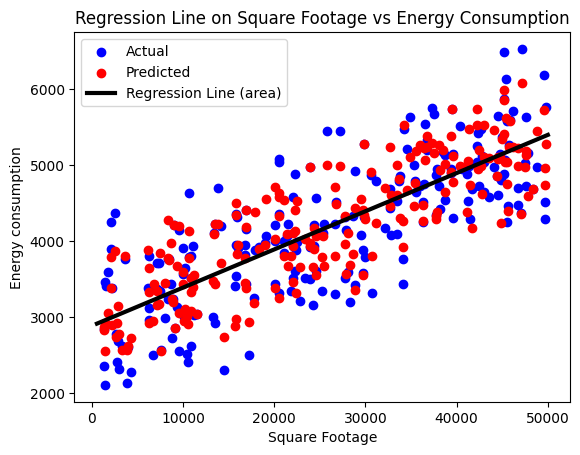

/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/sarvesh/CSL701-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


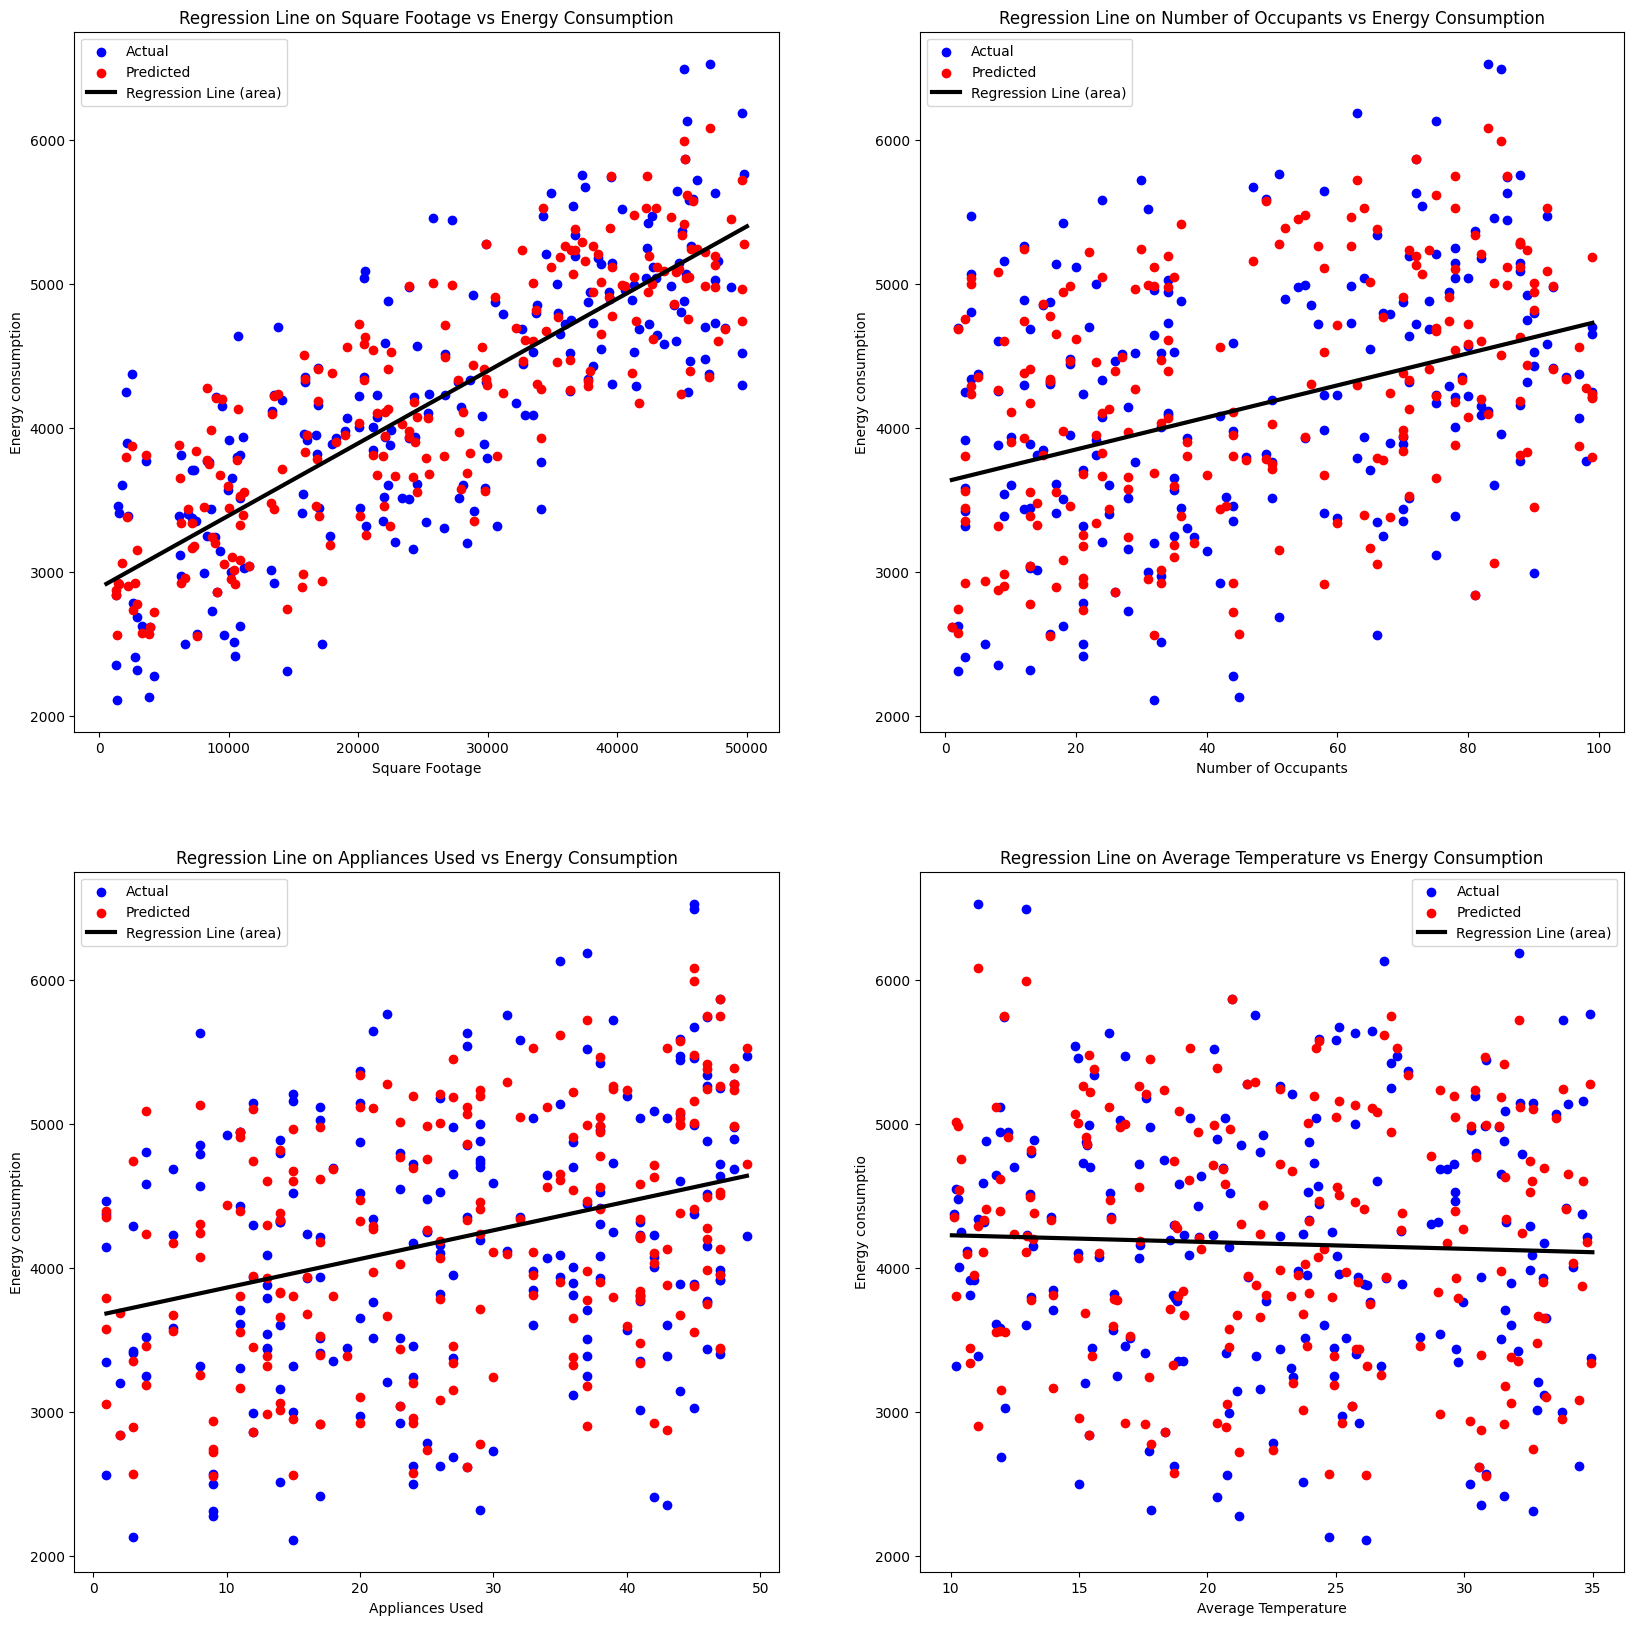

In [72]:
plt.scatter(X_test['Square Footage'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Square Footage'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['Square Footage'].min(), X['Square Footage'].max(), 100).reshape(-1, 1)

lr_model2.fit(X_train[['Square Footage']], y_train)
# two square brackets convert input to 2d column
area_pred_line = lr_model2.predict(area_values)
plt.plot(area_values, area_pred_line, color='black', label='Regression Line (area)', linewidth=3)

plt.xlabel('Square Footage')
plt.ylabel('Energy consumption')
plt.title('Regression Line on Square Footage vs Energy Consumption')
plt.legend()
plt.show()


#For subplot 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

axes[0, 0].scatter(X_test['Square Footage'], y_test, color='blue', label='Actual')
axes[0, 0].scatter(X_test['Square Footage'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['Square Footage'].min(), X['Square Footage'].max(), 100).reshape(-1, 1)

lr_model2.fit(X_train[['Square Footage']], y_train)
# two square brackets convert input to 2d column
area_pred_line = lr_model2.predict(area_values)
axes[0, 0].plot(area_values, area_pred_line, color='black', label='Regression Line (area)', linewidth=3)

axes[0, 0].set_xlabel('Square Footage')
axes[0, 0].set_ylabel('Energy consumption')
axes[0, 0].set_title('Regression Line on Square Footage vs Energy Consumption')
axes[0, 0].legend()

#Subplot 2
axes[0, 1].scatter(X_test['Number of Occupants'], y_test, color='blue', label='Actual')
axes[0, 1].scatter(X_test['Number of Occupants'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['Number of Occupants'].min(), X['Number of Occupants'].max(), 100).reshape(-1, 1)

lr_model2.fit(X_train[['Number of Occupants']], y_train)
# two square brackets convert input to 2d column
area_pred_line = lr_model2.predict(area_values)
axes[0, 1].plot(area_values, area_pred_line, color='black', label='Regression Line (area)', linewidth=3)

axes[0, 1].set_xlabel('Number of Occupants')
axes[0, 1].set_ylabel('Energy consumption')
axes[0, 1].set_title('Regression Line on Number of Occupants vs Energy Consumption')
axes[0, 1].legend()

#Subplot 3


axes[1, 0].scatter(X_test['Appliances Used'], y_test, color='blue', label='Actual')
axes[1, 0].scatter(X_test['Appliances Used'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['Appliances Used'].min(), X['Appliances Used'].max(), 100).reshape(-1, 1)

lr_model2.fit(X_train[['Appliances Used']], y_train)
# two square brackets convert input to 2d column
area_pred_line = lr_model2.predict(area_values)
axes[1, 0].plot(area_values, area_pred_line, color='black', label='Regression Line (area)', linewidth=3)

axes[1, 0].set_xlabel('Appliances Used')
axes[1, 0].set_ylabel('Energy consumption')
axes[1, 0].set_title('Regression Line on Appliances Used vs Energy Consumption')
axes[1, 0].legend()

#Subplot 4

axes[1, 1].scatter(X_test['Average Temperature'], y_test, color='blue', label='Actual')
axes[1, 1].scatter(X_test['Average Temperature'], y_pred, color='red', label='Predicted')


area_values = np.linspace(X['Average Temperature'].min(), X['Average Temperature'].max(), 100).reshape(-1, 1)

lr_model2.fit(X_train[['Average Temperature']], y_train)
# two square brackets convert input to 2d column
area_pred_line = lr_model2.predict(area_values)
axes[1, 1].plot(area_values, area_pred_line, color='black', label='Regression Line (area)', linewidth=3)

axes[1,1].set_xlabel('Average Temperature')
axes[1,1].set_ylabel('Energy consumptio')
axes[1,1].set_title('Regression Line on Average Temperature vs Energy Consumption')
axes[1,1].legend()